In [1]:
%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import Draw, PandasTools
from fragmenstein import Victor, Igor
import sys
import pandas as pd

In [2]:
# definitions
def place(hits,  # list of rdkit mol objects of hits to help place
          apo_file,  # path to pdb file for protein
          work_path,
          smiles,
          name):
    Igor.init_pyrosetta()
    v = Victor(hits=hits, pdb_filename=apo_file)
    v.work_path = work_path
    v.place(smiles, long_name=name)

In [4]:
# load scaffolds to place
df = pd.read_csv('../designs/syndirella_input_amidation_90'
                 '_scaffolds.csv')
df

,smiles,reactants,reaction_names,num_steps,hits,compound_set
0,Cc1cc(NC(=O)/C=C/c2ccc3occc3c2)n(C)n1,"[('O=C(O)/C=C/c1ccc2occc2c1', 'Cc1cc(N)n(C)n1')]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
1,COc1cc(/C=C/C(=O)Nc2cc(C)nn2C)ccc1O,"[('COc1cc(/C=C/C(=O)O)ccc1O', 'Cc1cc(N)n(C)n1')]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
2,Cc1cc(NC(=O)/C=C/c2ccc(O)c(O)c2)n(C)n1,"[('O=C(O)/C=C/c1ccc(O)c(O)c1', 'Cc1cc(N)n(C)n1')]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
3,Cc1cc(NC(=O)CNC(=O)c2cc(C)oc2C)n(C)n1,"[('Cc1cc(C(=O)NCC(=O)O)c(C)o1', 'Cc1cc(N)n(C)n...",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
4,Cc1cc(NC(=O)/C=C/c2ccc3c(c2)OCO3)n(C)n1,"[('O=C(O)/C=C/c1ccc2c(c1)OCO2', 'Cc1cc(N)n(C)n...",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
...,...,...,...,...,...,...
85,Cc1cc(CNC(=O)/C=C/c2cc3ccccc3o2)n(C)n1,"[('O=C(O)/C=C/c1cc2ccccc2o1', 'Cc1cc(CN)n(C)n1')]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
86,Cc1cc(CNC(=O)CCC2=NC(=S)N=C2)n(C)n1,"[('O=C(O)CCC1=NC(=S)N=C1', 'Cc1cc(CN)n(C)n1')]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
87,Cc1cc(CNC(=O)c2ccc3c(c2)=NC(=O)N=3)n(C)n1,"[('O=C1N=c2ccc(C(=O)O)cc2=N1', 'Cc1cc(CN)n(C)n...",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
88,Cc1cc(CNC(=O)CNC(=O)c2ccsc2)n(C)n1,"[('O=C(O)CNC(=O)c1ccsc1', 'Cc1cc(CN)n(C)n1')]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024


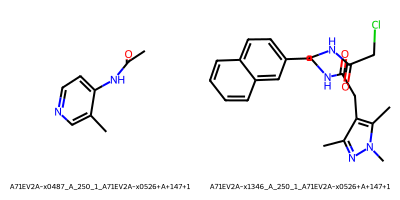

In [5]:
# load hits
hits = PandasTools.LoadSDF('../fragments/A71EV2A_combined.sdf')
hit_names = df['hits'].tolist()[0].split(' ')
hits = hits[hits['ID'].isin(hit_names)]
PandasTools.FrameToGridImage(hits, legendsCol='ID', molsPerRow=2)

In [6]:
hit_mols = hits.ROMol.tolist()
apo_file = '../fragments/Ax0310a_min2.pdb'
work_path = '../designs/amidation_scaffolds_90_placed'
for i, row in df.iterrows():
    try: 
        place(hit_mols, apo_file, work_path, row['smiles'], f'{row['compound_set']}_{i}')
    except Exception as e:
        print(e)
        continue

matteo-reactants-aug-2024-0 - Folder ../designs/amidation_scaffolds_90_placed/matteo-reactants-aug-2024-0 exists.


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org


Provided mapping is very unfavourable... using that along for expanding the search
matteo-reactants-aug-2024-1 - Folder ../designs/amidation_scaffolds_90_placed/matteo-reactants-aug-2024-1 exists.


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org


matteo-reactants-aug-2024-2 - Folder ../designs/amidation_scaffolds_90_placed/matteo-reactants-aug-2024-2 exists.


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org


matteo-reactants-aug-2024-3 - Folder ../designs/amidation_scaffolds_90_placed/matteo-reactants-aug-2024-3 exists.


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org


matteo-reactants-aug-2024-4 - Folder ../designs/amidation_scaffolds_90_placed/matteo-reactants-aug-2024-4 exists.


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org


matteo-reactants-aug-2024-5 - Folder ../designs/amidation_scaffolds_90_placed/matteo-reactants-aug-2024-5 exists.


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org


matteo-reactants-aug-2024-6 - Folder ../designs/amidation_scaffolds_90_placed/matteo-reactants-aug-2024-6 exists.


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org


matteo-reactants-aug-2024-7 - Folder ../designs/amidation_scaffolds_90_placed/matteo-reactants-aug-2024-7 exists.


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org
┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                 

Provided mapping is very unfavourable... using that along for expanding the search
Provided mapping is very unfavourable... using that along for expanding the search


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org
┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                 

Provided mapping is very unfavourable... using that along for expanding the search
Provided mapping is very unfavourable... using that along for expanding the search


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org
┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                 

Provided mapping is very unfavourable... using that along for expanding the search
Provided mapping is very unfavourable... using that along for expanding the search


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.m1.cxx11thread.serialization.python312.Release 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org
┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                 